# Implementazione da zero di KMeans con un esempio geografico

In [1]:
import numpy as np

In [2]:
from geopy import distance

In [3]:
from sklearn.metrics import pairwise_distances

In [4]:
import matplotlib.pyplot as plt

In [5]:
data_file = './data/IT.txt'
with open(data_file, 'r') as infile:
    all_lines = infile.readlines()

In [6]:
lines = np.random.choice(all_lines[1:], size=500, replace=False)
len(lines)

500

In [7]:
cities, latitude, longitude = [], [], []
for line in lines:
    row = line.split(',')
    cities.append(row[2])
    latitude.append(float(row[-3]))
    longitude.append(float(row[-2]))

In [8]:
geo = np.array([latitude, longitude]).T

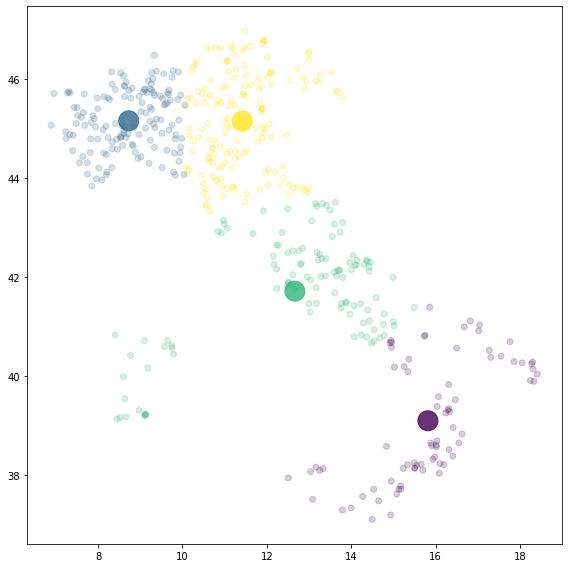

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(geo[:,1], geo[:,0], alpha=0.2, c=assignement)
ax.scatter(C[:,1], C[:,0], alpha=0.8, s=400, c=range(k))
plt.tight_layout()
plt.show()

In [17]:
from collections import defaultdict

In [18]:
town_index = defaultdict(list)
for city_index, cluster_id in enumerate(assignement):
    town_index[cluster_id].append(city_index)

In [27]:
town_names = [cities[i] for i in town_index[0]]

In [28]:
town_names[:10]

['Marausa',
 'Villagrazia Di Carini',
 'Villaggio Boncore',
 'San Severino Di Centola',
 'Tressanti',
 "Cannistra'",
 "Brattiro'",
 'Mongiana',
 'Giumarra',
 'Messina']

## Problema
> come collocare k uffici di spedizione in modo da minimizzare le distanze dai comuni italiani

### Requisiti
- Rappresentazione dei punti da raggruppare $\rightarrow$ $M^{n \times 2}$
- Parametro $k$
- Generare casualmente $k$ punti nello spazio $M^{n \times 2}$ $\rightarrow$ generare casualmente una matrice $C^{k \times 2}$
- Funzione che calcoli la distanza fra ogni punto e ogni centro $c \in C$
    - Euclidean distance
    - Geodesic ditance
- Assegnare i punti al centro più vicino
- Funzione che calcoli 
$$RSS = \sum\limits_{k \in K} \sum\limits_{p \in k} (p - \eta_k)^2$$
- Ciclo per rieseguire i punti precedenti fino alla condizione di uscita
- Condizione di uscita

In [10]:
k = 4

In [11]:
C = np.zeros((k, 2))

In [12]:
x = np.random.choice(geo[:,0], 4)
y = np.random.choice(geo[:,1], 4)
C[:,0] = x
C[:,1] = y

In [13]:
euclidean = lambda x, y: np.linalg.norm(x - y)
geodist = lambda x, y: distance.distance(x, y).km

In [14]:
history = []
for iterations in range(1000):
    storage = pairwise_distances(geo, C, metric=geodist)
    assignement = np.argmin(storage, axis=1)
    RSS = 0
    for i in range(k):
        indexes = [j for j, x in enumerate(assignement) if x == i]
        cluster_geo = geo[indexes,:]
        C[i] = cluster_geo.mean(axis=0)
        RSS += sum([geodist(x, C[i])**2 for x in cluster_geo])
    history.append(RSS)
    if len(history) > 2 and (history[-2] - history[-1]) < 100:
        break

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(history)
plt.tight_layout()
plt.show()

### Versione from scratch

In [ ]:
history = []
for iterations in range(1000):
    storage = np.zeros((geo.shape[0], C.shape[0]))
    for i, town in enumerate(geo):
        storage[i] = np.zeros(k)
        for j, center in enumerate(C):
            delta = geodist(town, center)
            storage[i,j] = delta
    assignement = np.argmin(storage, axis=1)
    RSS = 0
    for i in range(k):
        indexes = [j for j, x in enumerate(assignement) if x == i]
        cluster_geo = geo[indexes,:]
        C[i] = cluster_geo.mean(axis=0)
        RSS += sum([geodist(x, C[i])**2 for x in cluster_geo])
    history.append(RSS)
    if len(history) > 2 and (history[-2] - history[-1]) < 100:
        break

### Version Sklearn

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)
y_hat = kmeans.fit_predict(geo)

In [ ]:
lines = np.random.choice(all_lines[1:], size=len(all_lines[1:]), replace=False)
cities, latitude, longitude = [], [], []
for line in lines:
    row = line.split(',')
    cities.append(row[2])
    latitude.append(float(row[-3]))
    longitude.append(float(row[-2]))
geo = np.array([latitude, longitude]).T

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(geo[:,1], geo[:,0], alpha=0.4, c=y_hat)
plt.tight_layout()
plt.show()